# imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf

import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [12, 8]

# Lecture 5:

## Financial Inovation

Financial innovation is the process of creating new financial products, services, or processes. Financial innovation has come via advances in financial instruments, technology, and payment systems. Digital technology has helped to transform the financial services industry, changing how we save, borrow, invest, and pay for goods.



Some examples of financial innovation are:

- Investment Crowdfunding is a way to source money for a company by asking a large number of backers to each invest a relatively small amount in it. In return, backers receive equity shares of the company.
- Remittances are a form of financial innovation that allows people to send money to their families in other countries. This is done through a variety of channels, including banks, money transfer companies, and mobile money services.
- Mobile Banking is a form of financial innovation that allows people to access their bank accounts through their mobile phones.



### Limited Liability



The idea is that investors, in order to be encouraged to invest in businesses, should have protection against liability for what the managers of the business do. So, an investor should not be liable for the debts or mistake of the business. This is the idea of limited liability.

- The idea was enuciated first in 1811 by New York State.

Limited liability is a type of legal structure for an organization where a corporate loss will not exceed the amount invested in a partnership or limited liability company (LLC). In other words, investors' and owners' private assets are not at risk if the company fails.

The limited liability feature is one of the biggest advantages of investing in publicly listed companies. While a shareholder can participate wholly in the growth of a company, their liability is restricted to the amount of the investment in the company, even if it subsequently goes bankrupt and has remaining debt obligations.


### Inflation Indexed Debt/Securities

Inflation indexed debt is a type of debt that is indexed to inflation. This means that the interest rate on the debt is adjusted to account for inflation. This is done by adding an inflation premium to the interest rate. The inflation premium is the difference between the nominal interest rate and the real interest rate. The real interest rate is the interest rate that would exist if there was no inflation. The nominal interest rate is the interest rate that exists in the economy.

An inflation-indexed security has its principal indexed to the Consumer Price Index (CPI), or some other nationally recognized inflation index, on a daily basis.

### Unidad de Fomento



The Unidad de Fomento (UF) is a unit of account used in Chile. It is a non-circulating currency; the exchange rate between the UF and the Chilean peso is constantly adjusted for inflation so that the value of the Unidad de Fomento remains almost constant on a daily basis during low inflation.

It has become the preferred and predominant measure to determine the cost of real estate, values of housing and any secured loan, either private or of the Chilean government. Individual payments are made in Chilean pesos (the country's legal tender), according to the daily value of the UF.

This is an innovation to deal with inflation

- **Money:** A medium of exchange, a unit of account, and a store of value.

# Lecture 6:

## Forecasting

Forecasting is the process of making predictions based on past and present data. Later these can be compared (resolved) against what happens. For example, a company might estimate their revenue in the next year, then compare it against the actual results. Prediction is a similar but more general term.

- Something that happended on past is not the represenative of what will happen in future.

### Random Walk

Random walk theory suggests that changes in stock prices have the same distribution and are independent of each other. Therefore, it assumes the past movement or trend of a stock price or market cannot be used to predict its future movement. In short, random walk theory proclaims that stocks take a random and unpredictable path that makes all methods of predicting stock prices futile in the long run.

We have,

$$ x_{t+1} = x_t + \epsilon_t $$

where $x_t$ is the value of the stock at time $t$, and $\epsilon_t$ is a noise and is completely unforcastable.

In [2]:
apple = pd.read_csv("data/AAPL.csv", index_col='Date', parse_dates=True)
apple.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-22,134.350006,134.559998,130.300003,132.229996,132.229996,77852100
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.860001,63771000
2022-12-27,131.380005,131.410004,128.720001,130.029999,130.029999,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,126.040001,85438400
2022-12-29,127.989998,130.479996,127.730003,129.610001,129.610001,75624700


In [3]:
Google = pd.read_csv("data/GOOG.csv", index_col='Date', parse_dates=True)
Google.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-22,88.930000,89.180000,86.940002,88.260002,88.260002,23656100
2022-12-23,87.620003,90.099998,87.620003,89.809998,89.809998,17810000
2022-12-27,89.309998,89.500000,87.535004,87.930000,87.930000,15470900
2022-12-28,87.500000,88.519997,86.370003,86.459999,86.459999,17879600
2022-12-29,87.029999,89.364998,86.989998,88.949997,88.949997,18262100


In [4]:
# apple stocks after 2022-01-01
apple = apple.loc['2022-01-01':]
apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.959732,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,178.663071,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.910660,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,171.007492,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,171.176529,86709100


In [5]:
px.line(apple, y='Close', title='Apple Stocks Price')

In [6]:
# Standard Deviation in the Stock of Apple

std = apple['Close'].std()
std

12.986333497304974

In [7]:
random_walk_price = []
curr_price = apple['Close'][-1]

for i in range(200):
    random_walk_price.append(curr_price)
    curr_price = curr_price + np.random.normal(0,  3)

random_walk_price = np.array(random_walk_price)


In [8]:
fig = px.line(x=range(200), y=random_walk_price, title='Random Walk Price')
fig.update_layout(xaxis_title='Days', yaxis_title='Price')


In [9]:
# Plotting both in one graph

fig = px.line(x = np.arange(0, len(apple["Close"])), y = apple['Close'], title='Apple Stocks Price')
fig.add_scatter(x = np.arange(len(apple["Close"]), len(apple["Close"]) + len(random_walk_price)), y = random_walk_price, mode='lines', name='Random Walk Price')
fig.update_layout(xaxis_title='Days', yaxis_title='Price')


- Let's simulate this process

In [10]:
start_price = apple['Close'][-1]

def random_walk(start_price, mu=0, sigma=3, days=200):
    price = []
    curr_price = start_price
    for i in range(days):
        price.append(curr_price)
        curr_price = curr_price + np.random.normal(mu, sigma)
    return np.array(price)

In [11]:
# simulate 100 random walks and plot them
# We'll also plot the mean of the random walks
fig = px.line(x = np.arange(0, len(apple["Close"])), y = apple['Close'], title='Apple Stocks Price')
fig.update_layout(xaxis_title='Days', yaxis_title='Price')
n = 100 # number of random walks
random_walk_prices = random_walk(start_price)
sum_walk_price = np.zeros((n, len(random_walk_prices)))
sum_walk_price[0] = random_walk_prices

fig.add_scatter(y=random_walk_prices, x=np.arange(len(apple["Close"]), len(apple["Close"]) + len(random_walk_prices)), mode="lines", name="Random_Walk: 0")
for i in range(1,n):
    random_walk_prices = random_walk(start_price)
    sum_walk_price[i] = random_walk_prices   # adding the random walk prices day by day
    
    fig.add_scatter(y=random_walk_prices, x=np.arange(len(apple["Close"]), len(apple["Close"]) + len(random_walk_prices)), mode="lines", name=f"Random_Walk: {i+1}")

min_prices = np.min(sum_walk_price, axis=0)
max_prices = np.max(sum_walk_price, axis=0)
fig.add_scatter(
    x=np.arange(len(apple["Close"]), len(apple["Close"]) + len(random_walk_prices)),
    y=np.mean(sum_walk_price, axis=0),
    mode="lines",
    name=f"Avereged",
    line=dict(color="royalblue", width=4),
)

fig.add_scatter(
    y=max_prices,
    x=np.arange(len(apple["Close"]), len(apple["Close"]) + len(random_walk_prices)),
    mode="lines",
    name=f"Max",
    line=dict(color="green", width=4),
)

fig.add_scatter(
    y=min_prices,
    x=np.arange(len(apple["Close"]), len(apple["Close"]) + len(random_walk_prices)),
    mode="lines",
    name=f"Min",
    line=dict(color="red", width=4),
)

fig.show()



- From above simulation we got to know that the stock price is not predictable, but we can get the rough idea of the lower and upper bound of the stock price. Which don't change much by running the simulation multiple times.

### First Order Auto Regressive Model

A statistical model is autoregressive if it predicts future values based on past values. For example, an autoregressive model might seek to predict a stock's future prices based on its past performance.

Autoregressive models operate under the premise that past values have an effect on current values, which is an opposite view to that of random walk theory. In other words, autoregressive models assume that past values can be used to predict future values.

In this case we have,

$$ x_{t+1} = x_0 + \rho(x_t - x_{0}) + \epsilon_t $$

where $x_0$ is the initial value of the stock, If $\rho$ is close to 1, then the stock price will be very volatile. If $\rho$ is close to 0, then the stock price will be very stable.

For $\rho$ = 1, It is called a random walk.

- This is a modified version of random walk. The middle term means that as the position is away from the mean position, it will try to move to the mean position.

In [12]:
# Let's Plot for $\rho = 0.5$

start_price = apple['Close'][-1]

def auto_regressive_random_walk(start_price, rho, sigma=3, days=200):
    price = []
    curr_price = start_price
    for i in range(days):
        price.append(curr_price)
        curr_price = start_price + rho*(curr_price - start_price  ) + np.random.normal(0, sigma)
    return np.array(price)

In [13]:
# simulate 100 random walks and plot them
# We'll also plot the mean of the random walks
fig = px.line(x = np.arange(0, len(apple["Close"])), y = apple['Close'], title='Apple Stocks Price')
fig.update_layout(xaxis_title='Days', yaxis_title='Price')

rho=0.9
n = 100 # number of random walks


auto_regressive_random_walk_prices = auto_regressive_random_walk(start_price, rho)
sum_walk_price = np.zeros((n, len(auto_regressive_random_walk_prices)))
sum_walk_price[0] = auto_regressive_random_walk_prices

fig.add_scatter(y=auto_regressive_random_walk_prices, x=np.arange(len(apple["Close"]), len(apple["Close"]) + len(auto_regressive_random_walk_prices)), mode="lines", name="auto_regressive_random_walk: 0")
for i in range(1,n):
    auto_regressive_random_walk_prices = auto_regressive_random_walk(start_price, rho)
    sum_walk_price[i] = auto_regressive_random_walk_prices   # adding the random walk prices day by day
    
    fig.add_scatter(y=auto_regressive_random_walk_prices, x=np.arange(len(apple["Close"]), len(apple["Close"]) + len(auto_regressive_random_walk_prices)), mode="lines", name=f"auto_regressive_random_walk: {i+1}")

min_prices = np.min(sum_walk_price, axis=0)
max_prices = np.max(sum_walk_price, axis=0)
fig.add_scatter(
    x=np.arange(len(apple["Close"]), len(apple["Close"]) + len(auto_regressive_random_walk_prices)),
    y=np.mean(sum_walk_price, axis=0),
    mode="lines",
    name=f"Avereged",
    line=dict(color="royalblue", width=4),
)

fig.add_scatter(
    y=max_prices,
    x=np.arange(len(apple["Close"]), len(apple["Close"]) + len(auto_regressive_random_walk_prices)),
    mode="lines",
    name=f"Max",
    line=dict(color="green", width=4),
)

fig.add_scatter(
    y=min_prices,
    x=np.arange(len(apple["Close"]), len(apple["Close"]) + len(auto_regressive_random_walk_prices)),
    mode="lines",
    name=f"Min",
    line=dict(color="red", width=4),
)

fig.show()



- Auto regressive model moves towards the mean position.

## Efficient Market Hypothesis

The efficient market hypothesis (EMH) is a theory that states that stock market prices reflect all available information. The EMH is a cornerstone of modern finance theory and is used to justify the efficient allocation of capital.

According to the EMH, stocks always trade at their fair value on exchanges, making it impossible for investors to purchase undervalued stocks or sell stocks for inflated prices. Therefore, it should be impossible to outperform the overall market through expert stock selection or market timing, and the only way an investor can obtain higher returns is by purchasing riskier investments.

**Weak Form**: prices incorporate information about past prices

**Semi Strong Form**: all publicly information is already incorporated in the market prices

**Strong Form**: all information including inside information held by the companies is already incorporated in the stock prices, prices because it leaks out.

- The hypothesis is only a "half truth".


## Price as PDV

Discounted present value is a concept in economics and finance that refers to a method of measuring the value of payments or utility that will be received in the future. Most people would agree that receiving 1,000 today is better than receiving 1,000 in a year, because $1,000 today can be used for consumption or investment.

By Gordon model, if the earnings by a stock is due to dividends and the dividends grow with factor g, we have:

$$ P = \frac{E}{r-g} $$

E can be seen as the value of the next year's dividends.



This means that if the P/E ratio is higher it would either have to be because it's low risk as measured by beta, so we willing to pay more for it because it's low risk. Or would have to be that people have reason to think that they're earning path the gross rate g is high.


# Lecture 7:

## Behavioral Finance

Behavioral finance, a subfield of behavioral economics, proposes that psychological influences and biases affect the financial behaviors of investors and financial practitioners. Moreover, influences and biases can be the source for the explanation of all types of market anomalies and specifically market anomalies in the stock market, such as severe rises or falls in stock price.

## Expected Utility Theory

In economics, utility is a term used to determine the worth or value of a good or service. More specifically, utility is the total satisfaction or benefit derived from consuming a good or service. Economic theories based on rational choice usually assume that consumers will strive to maximize their utility.

People are rational and are trying to maximize their utility which is an measure of happiness.


## Prospect Theory

Prospect theory is is a experimentally based set of knowledge about mistakes that people make. This is based on research by Kahneman and Tversky of people making decisions under uncertainty and is a modification of the expected utility theory. The theory is based on some real life facts such as:


1. People are overly focused on little losses, little gains and losses.
2. Another thing is that people will often try to gamble out of losses. If you went to the casino and you lost money, you think, maybe I should gamble some more, maybe I can get back to where I was.
3. People have a skewed representation of probability, and they do not treat gains and losses equivalently.

Prospect theory assumes that losses and gains are valued differently, and thus individuals make decisions based on perceived gains instead of perceived losses. Also known as the "loss-aversion" theory, the general concept is that if two choices are put before an individual, both equal, with one presented in terms of potential gains and the other in terms of possible losses, the former option will be chosen.

The main assumption of the prospect theory is that people are not very rational; which is in contrast with the traditional economic models that people are very sensible and calculating.

- Efficient market hypothesis and behavioral finance are two main revolution of past 50-60 years. These two revolutions are kind of incompatible views of the world. But they both offer insights, they're both exciting.

### Value Function in Prospect Theory

Tversky and Kahneman proposed that losses cause a greater emotional impact on an individual than does an equivalent amount of gain, so given choices presented two ways—with both offering the same result—an individual will pick the option offering perceived gains.

For example, assume that the end result of receiving 25. One option is being given 25 outright. The other option is being given 50 and then having to give back 25. The utility of the 25 is exactly the same in both options. However, individuals are most likely to choose to receive straight cash because a single gain is generally observed as more favorable than initially having more cash and then suffering a loss.

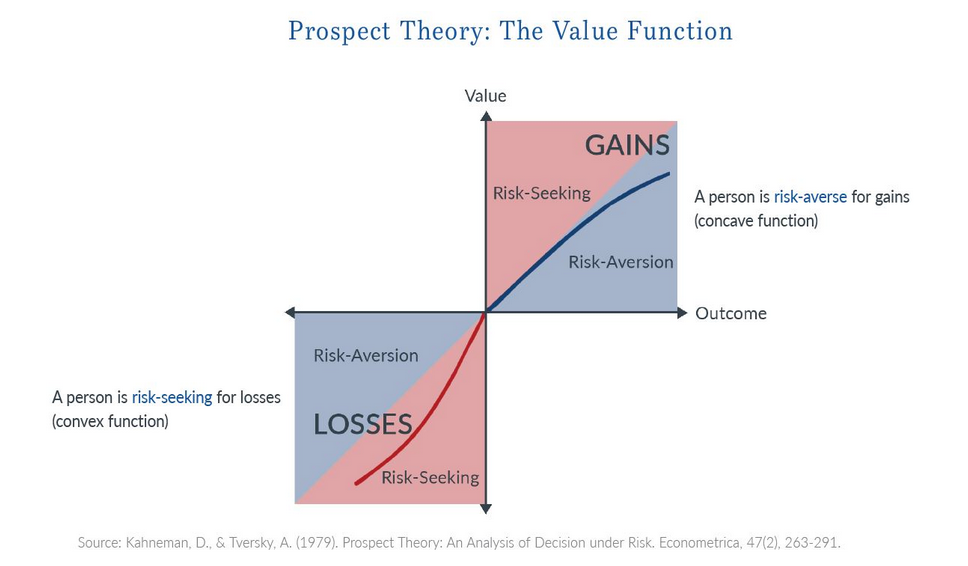

Example: Let's say I toss a coin. If it turns head, I'll give you 200 and if it turns tail you'll give me 100. So, you have an expected return of 50. By expected utility theory, you should take the bet. However, people don't usually take the bet.

This can be understood by the prospect thoery. People don't take the bet because the gaining 200 gives a little happiness but losing 100 gives a lot of unhappiness. This is called the loss aversion namely, people are more afraid of loosing. ("You are always worried about little losses today.")

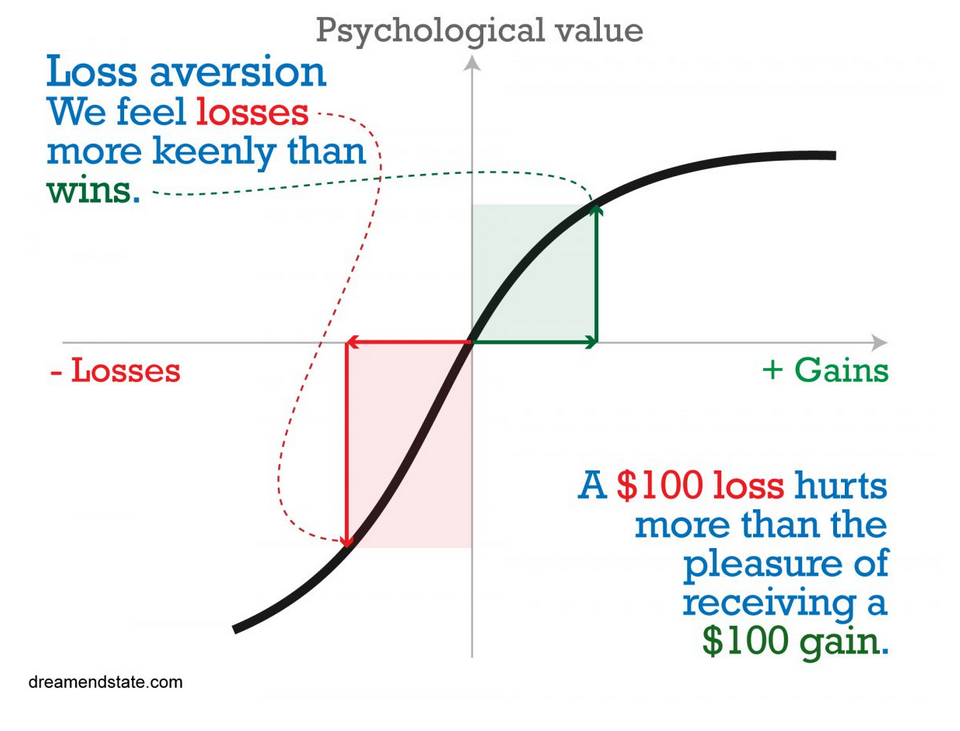

## Logical Fallacies

1. **Overconfidence**
2. **Wishful Thinking Bias**: People overestimate the probability of the things that they identify with and want to see happen. Very simple, you ask people what they think the probability of their team winning is. And it's always higher if it's their team.
3. **Overconfidence in Friends or Leaders**

## Anchoring

Anchoring is a cognitive bias that describes the tendency for people to rely too heavily on the first piece of information offered (the "anchor") when making decisions. Anchoring is a form of cognitive bias that can lead to suboptimal decisions.

Anchoring refers to a tendency in ambiguous situations to allow one's decisions to be affected by some anchor. it's the same way I think with stock prices, that stock prices are anchored to past values. Nobody knows what this company is worth but it was worth something yesterday.